# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
physical_devices=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [231]:
from keras import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator
from keras.utils import to_categorical as tcg
from keras.optimizers import Adam

In [84]:
import cv2
import os
import itertools

In [91]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
data='N:\\Data Science\\notebooks\\GTSRB'

## Importing images using OpenCV and preprocessing it

In [143]:
def load_data(dataset):
    images = []
    classes = []
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(data, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
                print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)
        X = np.array(images)
        y = np.array(classes)
    
    return (X, y)

In [144]:
(trainX, trainY) = load_data('Train.csv')

loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 4500
loaded: 5000
loaded: 5500
loaded: 6000
loaded: 6500
loaded: 7000
loaded: 7500
loaded: 8000
loaded: 8500
loaded: 9000
loaded: 9500
loaded: 10000
loaded: 10500
loaded: 11000
loaded: 11500
loaded: 12000
loaded: 12500
loaded: 13000
loaded: 13500
loaded: 14000
loaded: 14500
loaded: 15000
loaded: 15500
loaded: 16000
loaded: 16500
loaded: 17000
loaded: 17500
loaded: 18000
loaded: 18500
loaded: 19000
loaded: 19500
loaded: 20000
loaded: 20500
loaded: 21000
loaded: 21500
loaded: 22000
loaded: 22500
loaded: 23000
loaded: 23500
loaded: 24000
loaded: 24500
loaded: 25000
loaded: 25500
loaded: 26000
loaded: 26500
loaded: 27000
loaded: 27500
loaded: 28000
loaded: 28500
loaded: 29000
loaded: 29500
loaded: 30000
loaded: 30500
loaded: 31000
loaded: 31500
loaded: 32000
loaded: 32500
loaded: 33000
loaded: 33500
loaded: 34000
loaded: 34500
loaded: 35000
loaded: 35500
loaded: 36000
lo

In [145]:
(testX, testY) = load_data('Test.csv')

loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 4500
loaded: 5000
loaded: 5500
loaded: 6000
loaded: 6500
loaded: 7000
loaded: 7500
loaded: 8000
loaded: 8500
loaded: 9000
loaded: 9500
loaded: 10000
loaded: 10500
loaded: 11000
loaded: 11500
loaded: 12000
loaded: 12500


# Normalizing images

In [146]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

## One-hot encoding...

In [147]:
trainY = tcg(trainY)
testY = tcg(testY)

In [148]:
class_totals = trainY.sum(axis=0)
class_weight = class_totals.max() / class_totals

# Building the model

In [232]:
model=Sequential()

In [233]:
model.add(Conv2D(32,(5,5),input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

In [234]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 16)        12816     
_________________________________________________________________
activation_50 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 16)       

In [235]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy'\
                 ,metrics=['accuracy'])

In [219]:
history=model.fit(x=trainX,y=trainY,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
981/981 [==============================] - 10s 9ms/step - loss: 2.9829 - accuracy: 0.2362 - val_loss: 1.0556 - val_accuracy: 0.6789
Epoch 2/10
981/981 [==============================] - 8s 9ms/step - loss: 1.0855 - accuracy: 0.6586 - val_loss: 0.5039 - val_accuracy: 0.8448
Epoch 3/10
981/981 [==============================] - 9s 9ms/step - loss: 0.6036 - accuracy: 0.8037 - val_loss: 0.3144 - val_accuracy: 0.9054
Epoch 4/10
981/981 [==============================] - 9s 9ms/step - loss: 0.3809 - accuracy: 0.8767 - val_loss: 0.2355 - val_accuracy: 0.9263
Epoch 5/10
981/981 [==============================] - 9s 9ms/step - loss: 0.2672 - accuracy: 0.9141 - val_loss: 0.1719 - val_accuracy: 0.9441
Epoch 6/10
981/981 [==============================] - 9s 9ms/step - loss: 0.1976 - accuracy: 0.9358 - val_loss: 0.1406 - val_accuracy: 0.9569
Epoch 7/10
981/981 [==============================] - 9s 9ms/step - loss: 0.1659 - accuracy: 0.9455 - val_loss: 0.1188 - val_accuracy: 0.9633662 - 

In [220]:
history=pd.DataFrame(history.history)

# Train Accuracy: 97%
# Validation Accuracy: ~98%

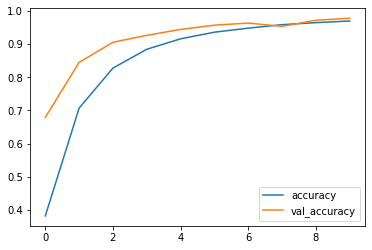

In [221]:
ax=history.accuracy.plot()
history.val_accuracy.plot(ax=ax)
ax.legend()

### Trying to predict from the test set. Taking random sample of size 1

In [253]:
img=load_img('00006.png',target_size=(32,32))

In [254]:
img=img_to_array(img)

In [255]:
img=img/255

In [256]:
test.loc[6,:]

Width                 147
Height                130
Roi.X1                 12
Roi.Y1                 12
Roi.X2                135
Roi.Y2                119
ClassId                18
Path       Test/00006.png
Name: 6, dtype: object

In [257]:
img=img.reshape(-1,32,32,3)

In [258]:
p=model.predict(img)

In [259]:
np.argmax(p,axis=-1)

array([18], dtype=int64)

# Test Accuracy : ~92%

In [229]:
model.evaluate(testX,testY)

395/395 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.9197


[0.31037086248397827, 0.9197149872779846]

### Augmenting images to increase dataset size

In [242]:
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)

In [245]:
data_aug.fit(trainX)

# Train Accuracy: 100%

In [250]:
for e in range(10):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in data_aug.flow(trainX, trainY, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(trainX) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

Epoch 0
1/1 [==============================] - 0s 9ms/step - loss: 2.1651 - accuracy: 0.2188


1/1 [==============================] - 0s 8ms/step - loss: 2.4959 - accuracy: 0.3438


1/1 [==============================] - 0s 8ms/step - loss: 1.5466 - accuracy: 0.5000


1/1 [==============================] - 0s 8ms/step - loss: 1.5397 - accuracy: 0.5625


1/1 [==============================] - 0s 9ms/step - loss: 1.6944 - accuracy: 0.5000


1/1 [==============================] - 0s 10ms/step - loss: 1.7010 - accuracy: 0.4688


1/1 [==============================] - 0s 10ms/step - loss: 1.1280 - accuracy: 0.5625


1/1 [==============================] - 0s 10ms/step - loss: 1.4174 - accuracy: 0.5625


1/1 [==============================] - 0s 9ms/step - loss: 1.2512 - accuracy: 0.5938


1/1 [==============================] - 0s 9ms/step - loss: 1.3196 - accuracy: 0.5938


1/1 [==============================] - 0s 10ms/step - loss: 1.5405 - accuracy: 0.5000


1/1 [==============================] - 0s 10ms/step - loss: 1.0190 - accuracy: 0.6875


1/1 [==============================] - 1s 787ms/step - loss: 1.4599 - accuracy: 0.4444
Epoch 1
1/1 [==============================] - 0s 10ms/step - loss: 1.5684 - accuracy: 0.5312


1/1 [==============================] - 0s 9ms/step - loss: 1.4216 - accuracy: 0.5625


1/1 [==============================] - 0s 9ms/step - loss: 1.3545 - accuracy: 0.5938


1/1 [==============================] - 0s 9ms/step - loss: 1.1826 - accuracy: 0.6250


1/1 [==============================] - 0s 8ms/step - loss: 1.1236 - accuracy: 0.6562


1/1 [==============================] - 0s 8ms/step - loss: 0.8775 - accuracy: 0.6562


1/1 [==============================] - 0s 10ms/step - loss: 1.1988 - accuracy: 0.6250


1/1 [==============================] - 0s 9ms/step - loss: 1.0098 - accuracy: 0.6875


1/1 [==============================] - 0s 9ms/step - loss: 0.7674 - accuracy: 0.7500


1/1 [==============================] - 0s 8ms/step - loss: 1.1053 - accuracy: 0.6250


1/1 [==============================] - 0s 8ms/step - loss: 0.8746 - accuracy: 0.6250


1/1 [==============================] - 0s 9ms/step - loss: 1.1913 - accuracy: 0.5938


1/1 [==============================] - 0s 9ms/step - loss: 0.6249 - accuracy: 0.7500


1/1 [==============================] - 0s 8ms/step - loss: 0.6698 - accuracy: 0.6667
Epoch 2
1/1 [==============================] - 0s 9ms/step - loss: 0.5925 - accuracy: 0.9062


1/1 [==============================] - 0s 9ms/step - loss: 1.0322 - accuracy: 0.6250


1/1 [==============================] - 0s 9ms/step - loss: 0.7395 - accuracy: 0.7188


1/1 [==============================] - 0s 10ms/step - loss: 0.8420 - accuracy: 0.7188


1/1 [==============================] - 0s 10ms/step - loss: 0.6407 - accuracy: 0.7812


1/1 [==============================] - 0s 11ms/step - loss: 1.1860 - accuracy: 0.6250


1/1 [==============================] - 0s 10ms/step - loss: 0.7798 - accuracy: 0.8125


1/1 [==============================] - 0s 9ms/step - loss: 1.1801 - accuracy: 0.6562


1/1 [==============================] - 0s 10ms/step - loss: 0.8716 - accuracy: 0.7188


1/1 [==============================] - 0s 10ms/step - loss: 0.9076 - accuracy: 0.7500


1/1 [==============================] - 0s 10ms/step - loss: 0.5154 - accuracy: 0.7812


1/1 [==============================] - 0s 10ms/step - loss: 0.5235 - accuracy: 0.8125


1/1 [==============================] - 0s 10ms/step - loss: 0.7702 - accuracy: 0.6875


1/1 [==============================] - 0s 9ms/step - loss: 0.8189 - accuracy: 0.5556
Epoch 3
1/1 [==============================] - 0s 8ms/step - loss: 0.8292 - accuracy: 0.7500


1/1 [==============================] - 0s 10ms/step - loss: 0.8346 - accuracy: 0.7812


1/1 [==============================] - 0s 9ms/step - loss: 0.6710 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.5502 - accuracy: 0.7812


1/1 [==============================] - 0s 9ms/step - loss: 0.7383 - accuracy: 0.7812


1/1 [==============================] - 0s 9ms/step - loss: 0.4000 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.3866 - accuracy: 0.8438


1/1 [==============================] - 0s 10ms/step - loss: 0.4944 - accuracy: 0.8125


1/1 [==============================] - 0s 9ms/step - loss: 0.4459 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.3973 - accuracy: 0.8125


1/1 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.8438


1/1 [==============================] - 0s 8ms/step - loss: 0.5267 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.8426 - accuracy: 0.7188


1/1 [==============================] - 0s 8ms/step - loss: 0.2092 - accuracy: 0.8889
Epoch 4
1/1 [==============================] - 0s 8ms/step - loss: 0.7415 - accuracy: 0.7812


1/1 [==============================] - 0s 9ms/step - loss: 0.4194 - accuracy: 0.9375


1/1 [==============================] - 0s 9ms/step - loss: 0.5534 - accuracy: 0.7812


1/1 [==============================] - 0s 10ms/step - loss: 0.5998 - accuracy: 0.7812


1/1 [==============================] - 0s 9ms/step - loss: 0.2974 - accuracy: 0.9375


1/1 [==============================] - 0s 9ms/step - loss: 0.2675 - accuracy: 0.9062


1/1 [==============================] - 0s 10ms/step - loss: 0.5379 - accuracy: 0.8438


1/1 [==============================] - 0s 11ms/step - loss: 0.3412 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.5230 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.2734 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.4804 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.5211 - accuracy: 0.8750


1/1 [==============================] - 0s 11ms/step - loss: 0.4125 - accuracy: 0.8750


1/1 [==============================] - 0s 8ms/step - loss: 0.0547 - accuracy: 1.0000
Epoch 5
1/1 [==============================] - 0s 9ms/step - loss: 0.2339 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.3458 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.6737 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.4115 - accuracy: 0.8438


1/1 [==============================] - 0s 11ms/step - loss: 0.2098 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.2344 - accuracy: 0.9062


1/1 [==============================] - 0s 9ms/step - loss: 0.4322 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.4352 - accuracy: 0.9062


1/1 [==============================] - 0s 11ms/step - loss: 0.3425 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.2807 - accuracy: 0.9375


1/1 [==============================] - 0s 16ms/step - loss: 0.4436 - accuracy: 0.7812


1/1 [==============================] - 0s 16ms/step - loss: 0.3216 - accuracy: 0.8750


1/1 [==============================] - 0s 19ms/step - loss: 1.1517 - accuracy: 0.7778
Epoch 6
1/1 [==============================] - 0s 14ms/step - loss: 0.4269 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.9062


1/1 [==============================] - 0s 11ms/step - loss: 0.4039 - accuracy: 0.9062


1/1 [==============================] - 0s 10ms/step - loss: 0.3429 - accuracy: 0.9375


1/1 [==============================] - 0s 8ms/step - loss: 0.4083 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.2961 - accuracy: 0.9062


1/1 [==============================] - 0s 10ms/step - loss: 0.1499 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.1114 - accuracy: 1.0000


1/1 [==============================] - 0s 10ms/step - loss: 0.3976 - accuracy: 0.8125


1/1 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.9062


1/1 [==============================] - 0s 9ms/step - loss: 0.1780 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.2084 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.4749 - accuracy: 0.8125


1/1 [==============================] - 0s 9ms/step - loss: 0.1006 - accuracy: 1.0000
Epoch 7
1/1 [==============================] - 0s 9ms/step - loss: 0.5250 - accuracy: 0.8125


1/1 [==============================] - 0s 9ms/step - loss: 0.2066 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.3621 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.2805 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.3288 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.5233 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.1802 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.2249 - accuracy: 0.9062


1/1 [==============================] - 0s 11ms/step - loss: 0.5203 - accuracy: 0.8125


1/1 [==============================] - 0s 9ms/step - loss: 0.1889 - accuracy: 0.9062


1/1 [==============================] - 0s 10ms/step - loss: 0.1229 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.2594 - accuracy: 0.8750


1/1 [==============================] - 0s 10ms/step - loss: 0.1235 - accuracy: 0.9688


1/1 [==============================] - 0s 11ms/step - loss: 0.1447 - accuracy: 1.0000
Epoch 8
1/1 [==============================] - 0s 9ms/step - loss: 0.2384 - accuracy: 0.9375


1/1 [==============================] - 0s 10ms/step - loss: 0.3716 - accuracy: 0.8438


1/1 [==============================] - 0s 9ms/step - loss: 0.0350 - accuracy: 1.0000


1/1 [==============================] - 0s 10ms/step - loss: 0.1316 - accuracy: 0.9688


1/1 [==============================] - 0s 10ms/step - loss: 0.2261 - accuracy: 0.9062


1/1 [==============================] - 0s 9ms/step - loss: 0.1104 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.1459 - accuracy: 0.9375


1/1 [==============================] - 0s 9ms/step - loss: 0.2284 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.2626 - accuracy: 0.8750


1/1 [==============================] - 0s 9ms/step - loss: 0.0841 - accuracy: 0.9688


1/1 [==============================] - 0s 11ms/step - loss: 0.2144 - accuracy: 0.9375


1/1 [==============================] - 0s 9ms/step - loss: 0.1745 - accuracy: 0.9688


1/1 [==============================] - 0s 17ms/step - loss: 0.2044 - accuracy: 0.9062


1/1 [==============================] - 0s 19ms/step - loss: 0.1362 - accuracy: 0.8889
Epoch 9
1/1 [==============================] - 0s 10ms/step - loss: 0.1209 - accuracy: 0.9688


1/1 [==============================] - 0s 13ms/step - loss: 0.4800 - accuracy: 0.8438


1/1 [==============================] - 0s 10ms/step - loss: 0.1565 - accuracy: 0.9375


1/1 [==============================] - 0s 15ms/step - loss: 0.0826 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.3291 - accuracy: 0.8750


1/1 [==============================] - 0s 11ms/step - loss: 0.1542 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.4567 - accuracy: 0.8438


1/1 [==============================] - 0s 10ms/step - loss: 0.0942 - accuracy: 1.0000


1/1 [==============================] - 0s 9ms/step - loss: 0.4966 - accuracy: 0.8125


1/1 [==============================] - 0s 14ms/step - loss: 0.1040 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.2417 - accuracy: 0.9688


1/1 [==============================] - 0s 9ms/step - loss: 0.2848 - accuracy: 0.8438


1/1 [==============================] - 0s 10ms/step - loss: 0.1625 - accuracy: 0.9375


1/1 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 1.0000


# Test Accuracy: 93.3%


In [251]:
model.evaluate(testX,testY)

395/395 [==============================] - 2s 4ms/step - loss: 0.2466 - accuracy: 0.9331: 1s - ETA: 0s - loss: 0.2508 


[0.2465953677892685, 0.9330958127975464]

In [260]:
model.save('final.h5')